<h1 align="center">Analysis of Indian Restaurants in New York</h1>
<h3 align="center">By Aziz Presswala</h3>

## 1. Introduction:
<p>New York City's demographics show that it is a large and ethnically diverse metropolis. It is the largest city in the United States with a long history of international immigration. New York City was home to nearly 8.5 million people in 2014, accounting for over 40% of the population of New York State. </p>
<p>Indians in the New York City metropolitan region constitute one of the largest and fastest growing ethnicities in the New York City metropolitan area. The New York City region is home to the largest Indian American population among metropolitan areas by a significant margin.</p>
<p>Due to large number of Indians in the city, Indian cuisine is very popular in and around New York. The growth in the New York City metropolitan region's Indian populace has been accompanied by growth in the number of Indian restaurants, located both within and outside of traditional Indian enclaves, such that within New York City proper alone, there are hundreds of Indian restaurants.</p>

## 2. Problem Definition:
Looking at all these Indian restaurants we can perform data analysis on them in the following way:-
- Visualize all the parts of New York City that have Indian restaurants.
- Top ranked Indian restaurants in New York City.
- Which areas have best Indian restaurants?
- Which areas lack good Indian restaurants?
- Which all areas have potential Indian restaurant market?
- Which areas are suitable for living if one prefers Indian cuisine?

## 3. Data:
- New York City data that contains list Boroughs, Neighbourhoods along with their latitude and longitude from https://cocl.us/new_york_dataset .
- Indian restaurants in each neighbourhood of New York City using Foursquare API.
- GeoSpace data that will help visualize choropleth map.

## 4. Methodology:

Following steps were followed:-
1. First we import New York City Data that contains list Boroughs, Neighbourhoods along with their latitude and longitude from https://cocl.us/new_york_dataset.
2. Using the latitude and longitude, we find venues for each Neighborhood via Foursquare API.
3. Then we filter out all the Indian Restaurants.
4. Next we retrieve information - Ratings, Likes, Tips for each Indian Restaurant, again by using Foursquare API.
5. Perform analysis on the data obtained.
6. Visualize the conclusions on the map of New York.

## 5. Code:

In [1]:
# importing required libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# map rendering library
import folium 

print('Libraries imported.')

Libraries imported.


**Variables required for Foursquare API**

In [159]:
CLIENT_ID = 'HWWJZQMYQ0CFXKZHFKR2YBMUVW1IVDAM3FZTOBFHS4SKFKQU'
CLIENT_SECRET = 'HRWVKYBXYJLEBSWJ20ABCU2CKLVYEG0IFBTDQYEJLWCY40MK'
VERSION = '20200401' # Foursquare API version
radius=1000
LIMIT=100

**Importing New York Data**

In [102]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [103]:
# displaying the json data loaded
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [104]:
# Sample of data imported
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

**Building a pandas dataframe from the json data loaded**

In [105]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [106]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [107]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [149]:
neighborhoods.shape

(306, 4)

### The above dataset shows that there are 306 Neighborhoods in New York

**Bar plot of Number of Neighborhoods per Borough in New York**

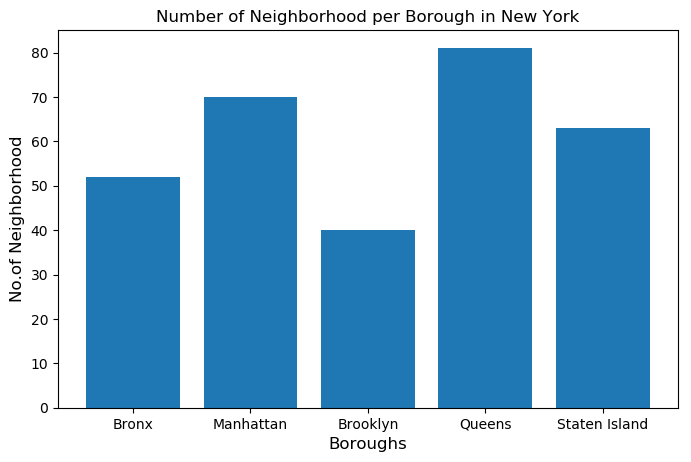

In [12]:
plt.figure(figsize=(8,5), dpi = 100)
plt.title('Number of Neighborhoods per Borough in New York')
plt.xlabel('Boroughs', fontsize = 12)
plt.ylabel('No.of Neighborhoods', fontsize=12)
plt.bar(neighborhoods['Borough'].unique(), neighborhoods.groupby('Borough').count()['Neighborhood'])
plt.show()

In [2]:
def get_venues(lat, lng):
    
    """Function that retrieves venues in its neighborhood 
    when supplied with latitude and longitude values"""
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data = results['response']['groups'][0]['items']
    venues_list = []
    for venue in venue_data:
        venue_id = venue['venue']['id']
        venue_name = venue['venue']['name']
        venue_category = venue['venue']['categories'][0]['name']
        venues_list.append([venue_id, venue_name, venue_category])
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venues_list, columns = column_names)
    return df

**Retrieving venues in a neighborhood, filtering only those venues that are 'Indian Restaurants' and 
populating them in a dataframe**

In [21]:
indian_rests_ny = pd.DataFrame(columns = ['Borough', 'Neighborhood', 'ID', 'Name'])
for row in neighborhoods.values.tolist():
    Borough, Neighborhood, lat, lng = row
    print("Borough "+Borough+" Neighborhood "+Neighborhood)
    print("Latitude "+lat+" Longitude "+lng)
    venues = get_venues(lat, lng)
    venues = venues[venues['Category'] == 'Indian Restaurant']
    for resturant_detail in venues.values.tolist():
        id, name , category = resturant_detail
        indian_rests_ny = indian_rests_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)

In [25]:
indian_rests_ny.shape

(141, 4)

In [3]:
indian_rests_ny.head()

Borough    Neighborhood                        ID  \
0   Bronx        Woodlawn  4c0448d9310fc9b6bf1dc761   
1   Bronx     Parkchester  4c194631838020a13e78e561   
2   Bronx  Spuyten Duyvil  4c04544df423a593ac83d116   
3   Bronx       Concourse  551b7f75498e86c00a0ed2e1   
4   Bronx       Unionport  4c194631838020a13e78e561   

                          Name  
0                   Curry Spot  
1  Melanies Roti Bar And Grill  
2         Cumin Indian Cuisine  
3                  Hungry Bird  
4  Melanies Roti Bar And Grill

### Therefore, 141 Indian Restaurants across New York were retrieved 

In [26]:
# Saving the data in a csv file
indian_rests_ny.to_csv('indian_rests_ny.csv', index=False)

In [2]:
indian_rests_ny_csv = pd.read_csv('indian_rests_ny.csv')

In [5]:
indian_rests_ny_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 4 columns):
Borough         141 non-null object
Neighborhood    141 non-null object
ID              141 non-null object
Name            141 non-null object
dtypes: object(4)
memory usage: 4.5+ KB


In [150]:
def get_restaurant_details(restaurant_id):
    '''Function that retrieves information of a particular venue when given the Venue ID'''
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            restaurant_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    restaurant_data = results['response']['venue']
    try:
        restaurant_id = restaurant_data['id']
        restaurant_name = restaurant_data['name']
        restaurant_likes = restaurant_data['likes']['count']
        restaurant_tips = restaurant_data['tips']['count']
        restaurant_rating = restaurant_data['rating']
        restaurant_info = [restaurant_id, restaurant_name, restaurant_likes, restaurant_tips, restaurant_rating]
        return restaurant_info
    except KeyError:
        restaurant_info = [restaurant_id, restaurant_name, restaurant_likes, restaurant_tips, 0]
        return restaurant_info

In [160]:
# fetching details for each Indian Restaurant
restaurant_details = pd.DataFrame(columns = ['ID','Name','Likes','Tips','Rating'])
count = 1
for row in indian_rests_ny_csv.values.tolist():
    Borough, Neighborhood, id, name = row
    l = get_restaurant_details(id)
    restaurant_details = restaurant_details.append({'ID': l[0],
                        'Name': l[1], 
                        'Likes': l[2],
                        'Tips' : l[3],
                        'Rating' : l[4]
                        }, ignore_index=True)
    print('(',count,'/', indian_rests_ny_csv.shape[0],')', name)
    count += 1

( 1 / 141 ) Curry Spot
( 2 / 141 ) Melanies Roti Bar And Grill
( 3 / 141 ) Cumin Indian Cuisine
( 4 / 141 ) Hungry Bird
( 5 / 141 ) Melanies Roti Bar And Grill
( 6 / 141 ) Taj Mahal
( 7 / 141 ) Bombay Grill
( 8 / 141 ) Pak Nasheman
( 9 / 141 ) Ashoka Grill
( 10 / 141 ) Great Indian Curry
( 11 / 141 ) Silver Krust
( 12 / 141 ) Mashallah
( 13 / 141 ) Madina Restaurant and Sweets
( 14 / 141 ) Diwan Grill
( 15 / 141 ) Kanan's Indian Restaurant
( 16 / 141 ) Dosa Royale
( 17 / 141 ) Dosa Royale
( 18 / 141 ) Masala Grill
( 19 / 141 ) Gandhi Fine Indian Cuisine
( 20 / 141 ) Tandoori Masala
( 21 / 141 ) Delhi Heights
( 22 / 141 ) Anarkali Indian Cuisine
( 23 / 141 ) Mashallah
( 24 / 141 ) Bombay Grill
( 25 / 141 ) Kismat Indian Restaurant
( 26 / 141 ) Clove Indian Restaurant & Bar
( 27 / 141 ) Mumbai Masala
( 28 / 141 ) Chapati House - NYC
( 29 / 141 ) Clove Indian Restaurant & Bar
( 30 / 141 ) Delhi Masala
( 31 / 141 ) Clove Indian Restaurant & Bar
( 32 / 141 ) Bawarchi
( 33 / 141 ) Drunken Mu

Now that we got data for all Indian Resturants, lets save this data to a csv sheet. In case we by mistake modify it. As the number of calls to get details for venue are premium call and have limit of 500 per day, we will refer to the saved csv for further analysis

In [165]:
# Saving the data in a csv file
restaurant_details.to_csv('restaurant_details.csv', index=False)

In [4]:
restaurant_details = pd.read_csv('restaurant_details.csv')

In [5]:
restaurant_details.head()

ID                         Name  Likes  Tips  Rating
0  4c0448d9310fc9b6bf1dc761                   Curry Spot      5    10     7.8
1  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     2     6.0
2  4c04544df423a593ac83d116         Cumin Indian Cuisine     13     9     6.0
3  551b7f75498e86c00a0ed2e1                  Hungry Bird      8     3     6.8
4  4c194631838020a13e78e561  Melanies Roti Bar And Grill      3     2     6.0

In [3]:
restaurant_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 5 columns):
ID        141 non-null object
Name      141 non-null object
Likes     141 non-null int64
Tips      141 non-null int64
Rating    141 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.6+ KB


In [8]:
# merging rests_stats with indian_rests_ny_csv dataframe to get lonitude, latitude, Neighborhood and Borough for each restaurant
rests_stats = pd.merge(restaurant_details , indian_rests_ny_csv)
rests_stats.drop_duplicates(inplace = True)
rests_stats.shape

(141, 7)

In [9]:
rests_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 0 to 256
Data columns (total 7 columns):
ID              141 non-null object
Name            141 non-null object
Likes           141 non-null int64
Tips            141 non-null int64
Rating          141 non-null float64
Borough         141 non-null object
Neighborhood    141 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 8.8+ KB


**Bar plot of Number of Restaurants per Borough in New York**

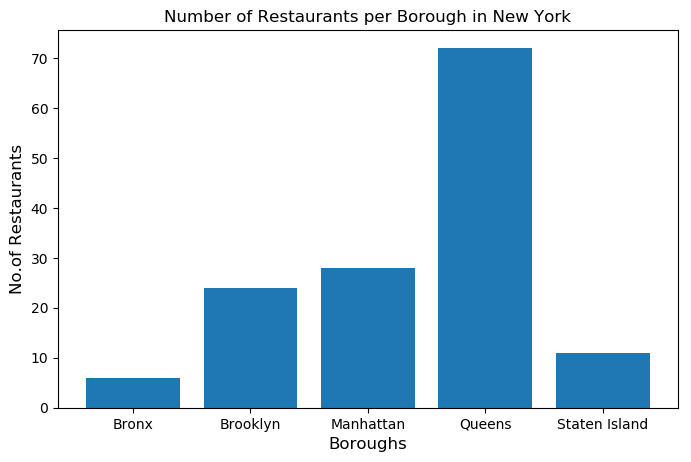

In [36]:
plt.figure(figsize=(8,5), dpi = 100)
plt.title('Number of Restaurants per Borough in New York')
plt.xlabel('Boroughs', fontsize = 12)
plt.ylabel('No.of Restaurants', fontsize=12)
plt.bar(rests_stats['Borough'].unique(), rests_stats.groupby('Borough').count()['ID'])
plt.show()

### Therefore, Queens has most number of Indian Restaurants

**Bar plot of Top 10 Neighborhoods with most Restaurants**

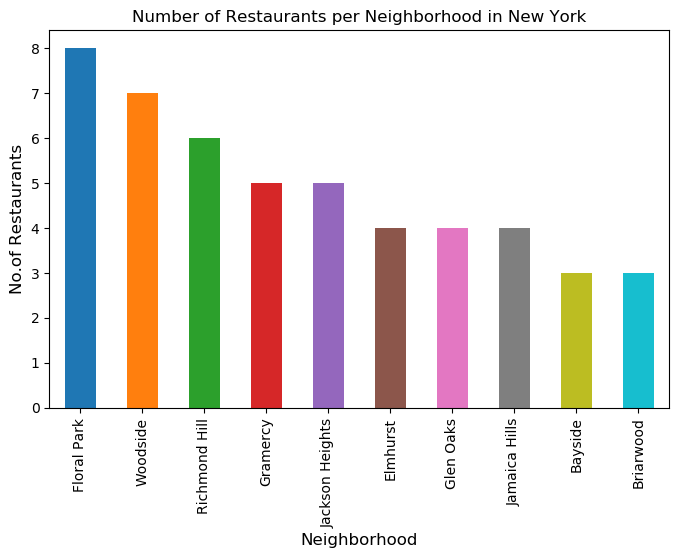

In [42]:
plt.figure(figsize=(8,5), dpi = 100)
plt.title('Number of Restaurants per Neighborhood in New York')
plt.xlabel('Neighborhood', fontsize = 12)
plt.ylabel('No.of Restaurants', fontsize=12)
rests_stats.groupby('Neighborhood')['ID'].count().nlargest(10).plot(kind='bar')
plt.show()

### Therefore, Floral Park (Queens) has highest (8) Indian Restaurants. They are listed below:-

In [43]:
rests_stats[rests_stats['Neighborhood'] == 'Floral Park']

ID                       Name  Likes  Tips  Rating  \
163  4b787c49f964a5209cd12ee3  Santoor Indian Restaurant     37    18     7.5   
169  4df0f39dd4c04d0392c853ea              Sagar Chinese      7     6     5.9   
206  527ffc0811d2d329d5e49abd              Jackson Diner      9     3     8.1   
207  4e4e3e22bd4101d0d7a5c2d1             Kerala Kitchen      5     6     8.4   
208  4b647b56f964a520c4b62ae3   Usha Foods & Usha Sweets     33    10     7.5   
209  4c0c01e0bbc676b00d6b4cd5              Mumbai Xpress     16    18     6.8   
210  4c76ff35a5676dcb72671721            Flavor Of India      6     6     5.9   
211  4e6bfe1c7d8b2c711b17bbe5    Surya sweets and snacks      0     1     0.0   

    Borough Neighborhood  
163  Queens  Floral Park  
169  Queens  Floral Park  
206  Queens  Floral Park  
207  Queens  Floral Park  
208  Queens  Floral Park  
209  Queens  Floral Park  
210  Queens  Floral Park  
211  Queens  Floral Park

### Now we will find the Indian restuarants with Maximum Likes, Maximum Ratings and Maximum Tips.

In [86]:
# Restaurant with maximum likes
rests_stats.loc[rests_stats['Likes'].idxmax()]

ID              4a12eb1ff964a52099771fe3
Name                               Dhaba
Likes                                497
Tips                                 164
Rating                               8.3
Borough                        Manhattan
Neighborhood                    Gramercy
Name: 90, dtype: object

In [84]:
# Restaurant with maximum tips
rests_stats.loc[rests_stats['Tips'].idxmax()]

ID              4a12eb1ff964a52099771fe3
Name                               Dhaba
Likes                                497
Tips                                 164
Rating                               8.3
Borough                        Manhattan
Neighborhood                    Gramercy
Name: 90, dtype: object

In [85]:
# Restaurant with maximum rating
rests_stats.loc[rests_stats['Rating'].idxmax()]

ID              4aa56c81f964a5204e4820e3
Name                 Seva Indian Cuisine
Likes                                239
Tips                                 133
Rating                                 9
Borough                           Queens
Neighborhood                     Astoria
Name: 93, dtype: object

### Now we will find the Indian Restuarant with Minimum Rating

In [13]:
# Restaurant with minimum rating
rests_stats_1 = rests_stats[rests_stats['Rating'] > 0 ]
rests_stats_1.loc[rests_stats_1['Rating'].idxmin()]

ID              4babc24ef964a5200ac73ae3
Name                  Royal India Palace
Likes                                  7
Tips                                   3
Rating                               5.8
Borough                           Queens
Neighborhood               Richmond Hill
Name: 137, dtype: object

### Calculating Average Rating for each Neighborhood

In [72]:
ny_neighborhood_stats = rests_stats.groupby('Neighborhood',as_index=False).mean()[['Neighborhood', 'Rating']]
ny_neighborhood_stats.columns = ['Neighborhood', 'Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

Neighborhood  Average Rating
0                     Astoria             9.0
6                  Blissville             9.0
13               Clinton Hill             8.8
12                    Chelsea             8.8
27                Fort Greene             8.8
54           Prospect Heights             8.7
74               West Village             8.7
55  Prospect Lefferts Gardens             8.7
68               Sutton Place             8.5
62           Roosevelt Island             8.5

### Calculating Average Rating for each Borough

In [70]:
ny_borough_stats=rests_stats.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False)

Borough  Average Rating
2      Manhattan        8.114286
1       Brooklyn        7.754167
3         Queens        6.659722
0          Bronx        6.566667
4  Staten Island        2.909091

**Bar plot of Average Rating of Indian Restaurants for each Borough**

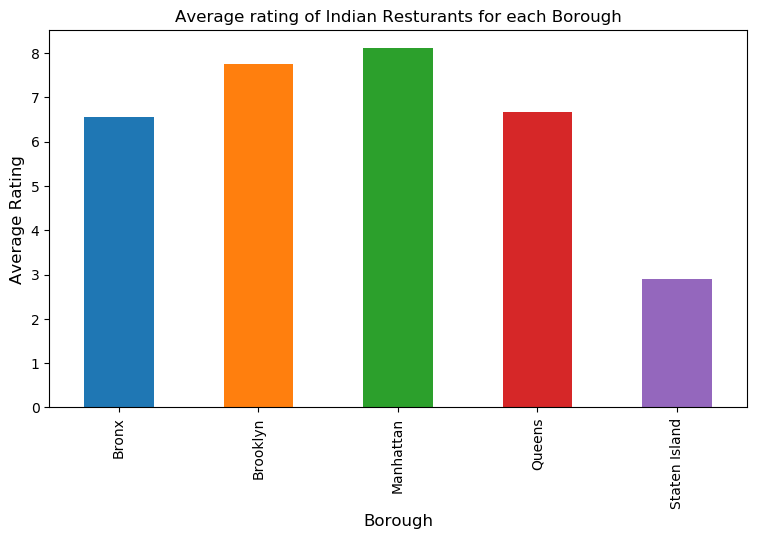

In [89]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Indian Resturants for each Borough')
plt.xlabel('Borough', fontsize = 12)
plt.ylabel('Average Rating', fontsize=12)
rests_stats.groupby('Borough').mean()['Rating'].plot(kind='bar')
plt.show()

### Selecting Neighborhoods whose Average Rating is >= 8.5 to visualize on map

In [94]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.5]
ny_neighborhood_stats

Neighborhood  Average Rating
0                     Astoria             9.0
6                  Blissville             9.0
12                    Chelsea             8.8
13               Clinton Hill             8.8
27                Fort Greene             8.8
35                 Holliswood             8.5
54           Prospect Heights             8.7
55  Prospect Lefferts Gardens             8.7
62           Roosevelt Island             8.5
68               Sutton Place             8.5
72            Upper West Side             8.5
74               West Village             8.7

In [114]:
ny_neighborhood_stats = pd.merge(ny_neighborhood_stats, neighborhoods)
ny_neighborhood_stats.drop_duplicates(inplace=True)
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [119]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

### Let's visualize these Neighborhoods on the map of New York

**Check file 'top_neigborhoods.html' for visualization**

In [138]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [139]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the neighborhood and add each to the feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [140]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [141]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

In [142]:
# Saving the map in a html file
ny_map.save('top_neigborhoods.html')

### Lets visualize Boroughs based on Average Rating

**Check file 'borough_rating.html' for visualization**

In [137]:
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
ny_geo = r'Borough_Boundaries.geojson'

map = ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='PuBu', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating'
)

# display map
# as this is huge map data , we will save it to a file
ny_map.save('borough_rating.html')

## 6. Conclusion
### Now, with all the analysis done, we found answers to all the questions below:-
#### 1. Which areas have best Indian restaurants? - Astoria (Queens), Blissville (Queens), Chelsea (Manhattan) are some of the best Neighborhoods with Indian Restaurants 
#### 2. Top ranked Indian restaurants in New York City are Seva Indian Cuisine (Rating-9.0), Dhaba(Tips-164, Likes-497).
#### 3. Which areas are suitable for living if one prefers Indian cuisine? - Manhattan is the suitable place to stay if one prefers Indian cuisine since the average rating of Restaurants in Manhattan is the highest (8.0).
#### 4. Which areas lack good Indian restaurants - Staten Island (least Indian Restaurants - 3).
#### 5. Which all areas have potential Indian Restaurant market - Manhattan & Brooklyn have potential Indian Restaurant market.